# Desharnais Dataset - Effort Estimation

@author: bharatnilam

Software cost estimation dataset from The PROMISE Repository of Software Engineering Databases: http://promise.site.uottawa.ca/SERepository/datasets/desharnais.arff

The goal of the project is to develop an effective effort estimation model achieving best possible accuracy level, op-
timizing software projects by estimating efforts for the same using machine learning
techniques.

## Import Libraries

In [131]:
from scipy.io import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor

## Data Import
##### Convert .arff file to .csv

In [2]:
ds_data = arff.loadarff('desharnais.arff')
ds = pd.DataFrame(ds_data[0])
ds.to_csv('desharnais.csv', index = False)

ds = pd.read_csv('desharnais.csv')

## Data Description

##### Show data header

In [3]:
ds.head(10)

Project  TeamExp  ManagerExp  YearEnd  Length  Effort  Transactions  \
0      1.0      1.0         4.0     85.0    12.0  5152.0         253.0   
1      2.0      0.0         0.0     86.0     4.0  5635.0         197.0   
2      3.0      4.0         4.0     85.0     1.0   805.0          40.0   
3      4.0      0.0         0.0     86.0     5.0  3829.0         200.0   
4      5.0      0.0         0.0     86.0     4.0  2149.0         140.0   
5      6.0      0.0         0.0     86.0     4.0  2821.0          97.0   
6      7.0      2.0         1.0     85.0     9.0  2569.0         119.0   
7      8.0      1.0         2.0     83.0    13.0  3913.0         186.0   
8      9.0      3.0         1.0     85.0    12.0  7854.0         172.0   
9     10.0      3.0         4.0     83.0     4.0  2422.0          78.0   

   Entities  PointsAdjust  Envergure  PointsNonAjust Language  
0      52.0         305.0       34.0           302.0     b'1'  
1     124.0         321.0       33.0           315.0     b'1'  
2      60.0         100.0       18.0            83.0     b'1'  
3     119.0         319.0       30.0           303.0     b'1'  
4      94.0         234.0       24.0           208.0     b'1'  
5      89.0         186.0       38.0           192.0     b'1'  
6      42.0         161.0       25.0           145.0     b'2'  
7      52.0         238.0       25.0           214.0     b'1'  
8      88.0         260.0       30.0           247.0     b'1'  
9      38.0         116.0       24.0           103.0     b'1'

##### Show summary of DataFrame

In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Project         81 non-null     float64
 1   TeamExp         79 non-null     float64
 2   ManagerExp      78 non-null     float64
 3   YearEnd         81 non-null     float64
 4   Length          81 non-null     float64
 5   Effort          81 non-null     float64
 6   Transactions    81 non-null     float64
 7   Entities        81 non-null     float64
 8   PointsAdjust    81 non-null     float64
 9   Envergure       81 non-null     float64
 10  PointsNonAjust  81 non-null     float64
 11  Language        81 non-null     object 
dtypes: float64(11), object(1)
memory usage: 7.3+ KB


In [5]:
nRow, nCol = ds.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 81 rows and 12 columns


##### Print column labels

In [6]:
ds.columns

Index(['Project', 'TeamExp', 'ManagerExp', 'YearEnd', 'Length', 'Effort',
       'Transactions', 'Entities', 'PointsAdjust', 'Envergure',
       'PointsNonAjust', 'Language'],
      dtype='object')

##### Count unique observations

In [7]:
ds.nunique(axis = 0)

Project           81
TeamExp            5
ManagerExp         7
YearEnd            6
Length            26
Effort            81
Transactions      73
Entities          61
PointsAdjust      77
Envergure         34
PointsNonAjust    77
Language           3
dtype: int64

##### Descriptive statistics

In [8]:
ds.describe()

Project    TeamExp  ManagerExp    YearEnd     Length        Effort  \
count  81.000000  79.000000   78.000000  81.000000  81.000000     81.000000   
mean   41.000000   2.265823    2.666667  85.790123  11.716049   5046.308642   
std    23.526581   1.336939    1.517574   1.147999   7.399721   4418.767228   
min     1.000000   0.000000    0.000000  83.000000   1.000000    546.000000   
25%    21.000000   1.000000    1.000000  85.000000   6.000000   2352.000000   
50%    41.000000   2.000000    3.000000  86.000000  10.000000   3647.000000   
75%    61.000000   4.000000    4.000000  87.000000  14.000000   5922.000000   
max    81.000000   4.000000    7.000000  88.000000  39.000000  23940.000000   

       Transactions    Entities  PointsAdjust  Envergure  PointsNonAjust  
count     81.000000   81.000000     81.000000  81.000000       81.000000  
mean     179.901235  122.333333    302.234568  27.629630      287.049383  
std      143.314916   84.882124    179.676812  10.591795      185.108137  
min        9.000000    7.000000     73.000000   5.000000       62.000000  
25%       88.000000   57.000000    176.000000  20.000000      152.000000  
50%      139.000000   99.000000    260.000000  28.000000      253.000000  
75%      223.000000  169.000000    382.000000  35.000000      350.000000  
max      886.000000  387.000000   1127.000000  52.000000     1116.000000

## Data Cleaning

##### Check missing values

In [9]:
ds.isnull().sum()

Project           0
TeamExp           2
ManagerExp        3
YearEnd           0
Length            0
Effort            0
Transactions      0
Entities          0
PointsAdjust      0
Envergure         0
PointsNonAjust    0
Language          0
dtype: int64

##### Fill missing values with mean of TeamExp and ManagerExp

In [10]:
mean_TeamExp = ds['TeamExp'].mean()
mean_ManagerExp = ds['ManagerExp'].mean()

ds['TeamExp'].fillna(int(mean_TeamExp), inplace = True)
ds['ManagerExp'].fillna(int(mean_ManagerExp), inplace = True)

Fix Language column

In [11]:
lang = ds['Language'].apply(lambda x: float(x.replace("b'","").replace("'","")))
ds['Language'] = lang

Save cleaned dataset

In [12]:
ds.to_csv('desharnais_clean.csv', index = False)

## EDA

##### Compute pairwise correlation of columns

In [13]:
ds.corr()

Project   TeamExp  ManagerExp   YearEnd    Length    Effort  \
Project         1.000000 -0.006436    0.295485  0.173094  0.263800  0.126153   
TeamExp        -0.006436  1.000000    0.408648 -0.145034  0.239123  0.229104   
ManagerExp      0.295485  0.408648    1.000000  0.043093  0.251841  0.182711   
YearEnd         0.173094 -0.145034    0.043093  1.000000 -0.027704 -0.007409   
Length          0.263800  0.239123    0.251841 -0.027704  1.000000  0.689834   
Effort          0.126153  0.229104    0.182711 -0.007409  0.689834  1.000000   
Transactions    0.270564  0.162325    0.162398  0.098565  0.608112  0.570278   
Entities        0.028787  0.318214    0.236203  0.038056  0.477860  0.510328   
PointsAdjust    0.229408  0.279804    0.241119  0.096597  0.710794  0.695956   
Envergure      -0.207774  0.302710   -0.094573 -0.009557  0.266579  0.463865   
PointsNonAjust  0.206035  0.308298    0.210211  0.087989  0.702247  0.729743   
Language        0.391475 -0.129382    0.237927  0.330216 -0.019643 -0.261942   

                Transactions  Entities  PointsAdjust  Envergure  \
Project             0.270564  0.028787      0.229408  -0.207774   
TeamExp             0.162325  0.318214      0.279804   0.302710   
ManagerExp          0.162398  0.236203      0.241119  -0.094573   
YearEnd             0.098565  0.038056      0.096597  -0.009557   
Length              0.608112  0.477860      0.710794   0.266579   
Effort              0.570278  0.510328      0.695956   0.463865   
Transactions        1.000000  0.186587      0.885773   0.334182   
Entities            0.186587  1.000000      0.621242   0.234747   
PointsAdjust        0.885773  0.621242      1.000000   0.377450   
Envergure           0.334182  0.234747      0.377450   1.000000   
PointsNonAjust      0.880024  0.600966      0.985836   0.507742   
Language            0.127597 -0.056439      0.075112  -0.199167   

                PointsNonAjust  Language  
Project               0.206035  0.391475  
TeamExp               0.308298 -0.129382  
ManagerExp            0.210211  0.237927  
YearEnd               0.087989  0.330216  
Length                0.702247 -0.019643  
Effort                0.729743 -0.261942  
Transactions          0.880024  0.127597  
Entities              0.600966 -0.056439  
PointsAdjust          0.985836  0.075112  
Envergure             0.507742 -0.199167  
PointsNonAjust        1.000000  0.039324  
Language              0.039324  1.000000

##### Correlation heatmap

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

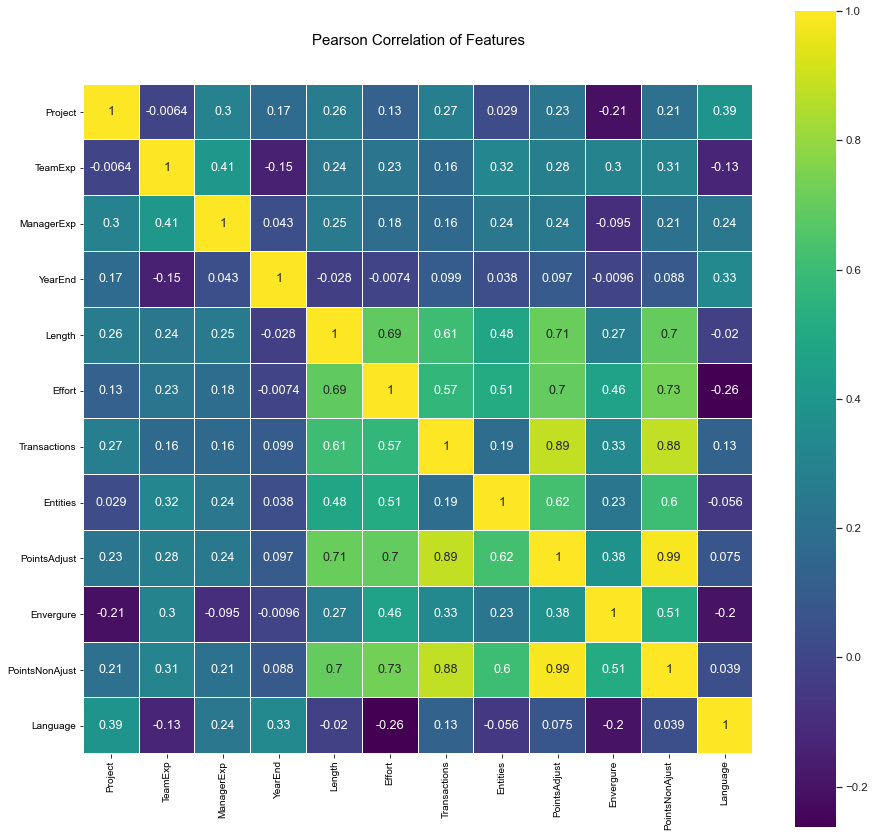

In [14]:
colormap = plt.cm.viridis
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.set(font_scale=1.05)
sns.heatmap(ds.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True,cmap=colormap, linecolor='white', annot=True)

##### Plot pairwise relationships

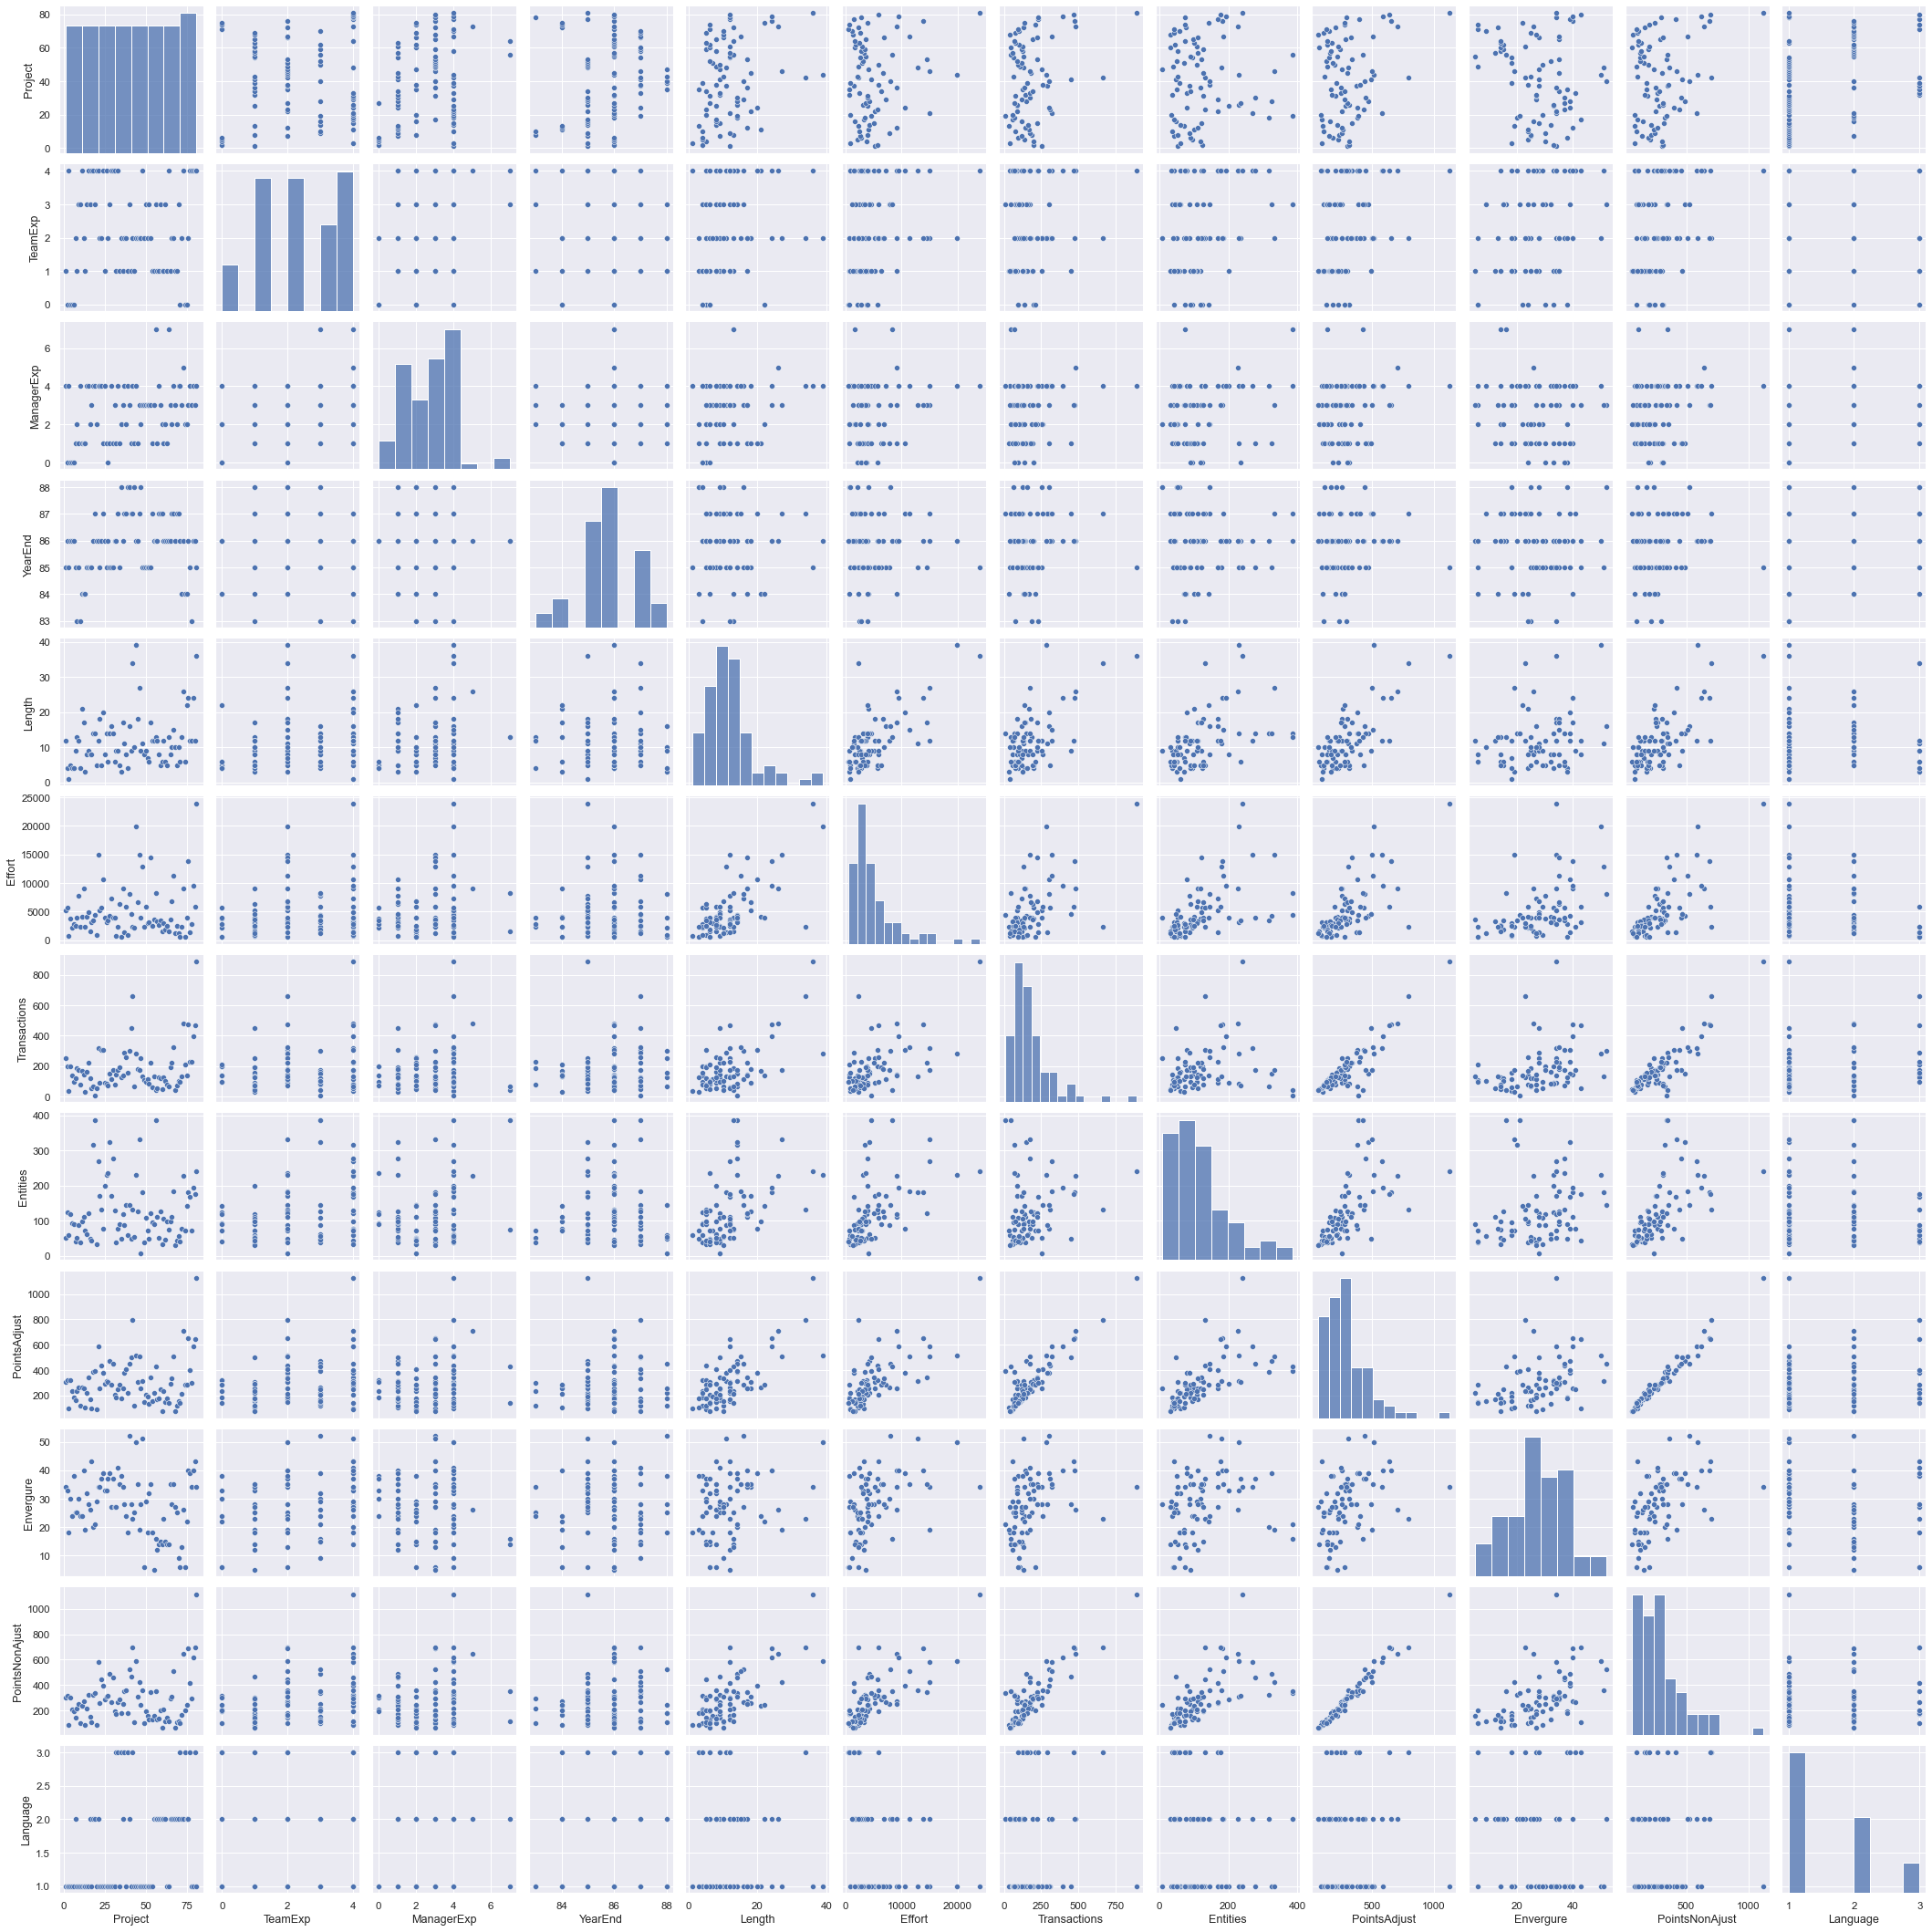

In [15]:
sns.pairplot(ds)

### Feature Selection

##### Mutual Information Regression
Estimate mutual information for a continuous target variable

In [16]:
from sklearn.feature_selection import mutual_info_regression

X = ds.drop('Effort', axis = 1)
y = ds['Effort']

mutual_info = mutual_info_regression(X, y)
mutual_info

array([0.09172386, 0.        , 0.06644563, 0.        , 0.23425675,
       0.13583368, 0.26261889, 0.33536976, 0.18435305, 0.46300618,
       0.18904111])

In [17]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

PointsNonAjust    0.463006
PointsAdjust      0.335370
Entities          0.262619
Length            0.234257
Language          0.189041
Envergure         0.184353
Transactions      0.135834
Project           0.091724
ManagerExp        0.066446
YearEnd           0.000000
TeamExp           0.000000
dtype: float64

<AxesSubplot:>

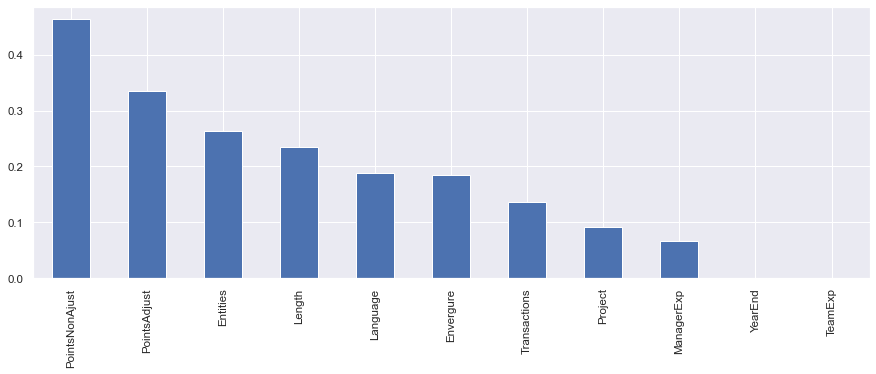

In [18]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

Select top 45 percentile

In [19]:
from sklearn.feature_selection import SelectPercentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=45)
selected_top_columns.fit(X, y)
X.columns[selected_top_columns.get_support()]

Index(['Length', 'Entities', 'PointsAdjust', 'PointsNonAjust', 'Language'], dtype='object')

##### Function to select highly correlated columns

In [20]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [21]:
corr_features = correlation(ds, 0.45)
len(set(corr_features))

6

In [22]:
corr_features

{'Effort',
 'Entities',
 'Envergure',
 'PointsAdjust',
 'PointsNonAjust',
 'Transactions'}

##### Pivot table using columns selected using mutual info regression and correlation function

In [23]:
pd.pivot_table(ds, index = ['Length', 'Transactions', 'Entities', 'PointsAdjust', 'Envergure', 'PointsNonAjust'], values = 'Effort').sort_values('Effort', ascending = False)

Effort
Length Transactions Entities PointsAdjust Envergure PointsNonAjust         
36.0   886.0        241.0    1127.0       34.0      1116.0          23940.0
39.0   284.0        230.0    514.0        50.0      591.0           19894.0
27.0   173.0        332.0    505.0        19.0      424.0           14987.0
12.0   318.0        269.0    587.0        34.0      581.0           14973.0
17.0   221.0        121.0    342.0        35.0      342.0           14434.0
...                                                                     ...
1.0    40.0         60.0     100.0        18.0      83.0              805.0
9.0    145.0        38.0     183.0        27.0      168.0             710.0
3.0    126.0        49.0     175.0        38.0      180.0             651.0
6.0    213.0        73.0     286.0        6.0       203.0             595.0
       97.0         42.0     139.0        6.0       99.0              546.0

[81 rows x 1 columns]

##### Pairplot for correlation among features

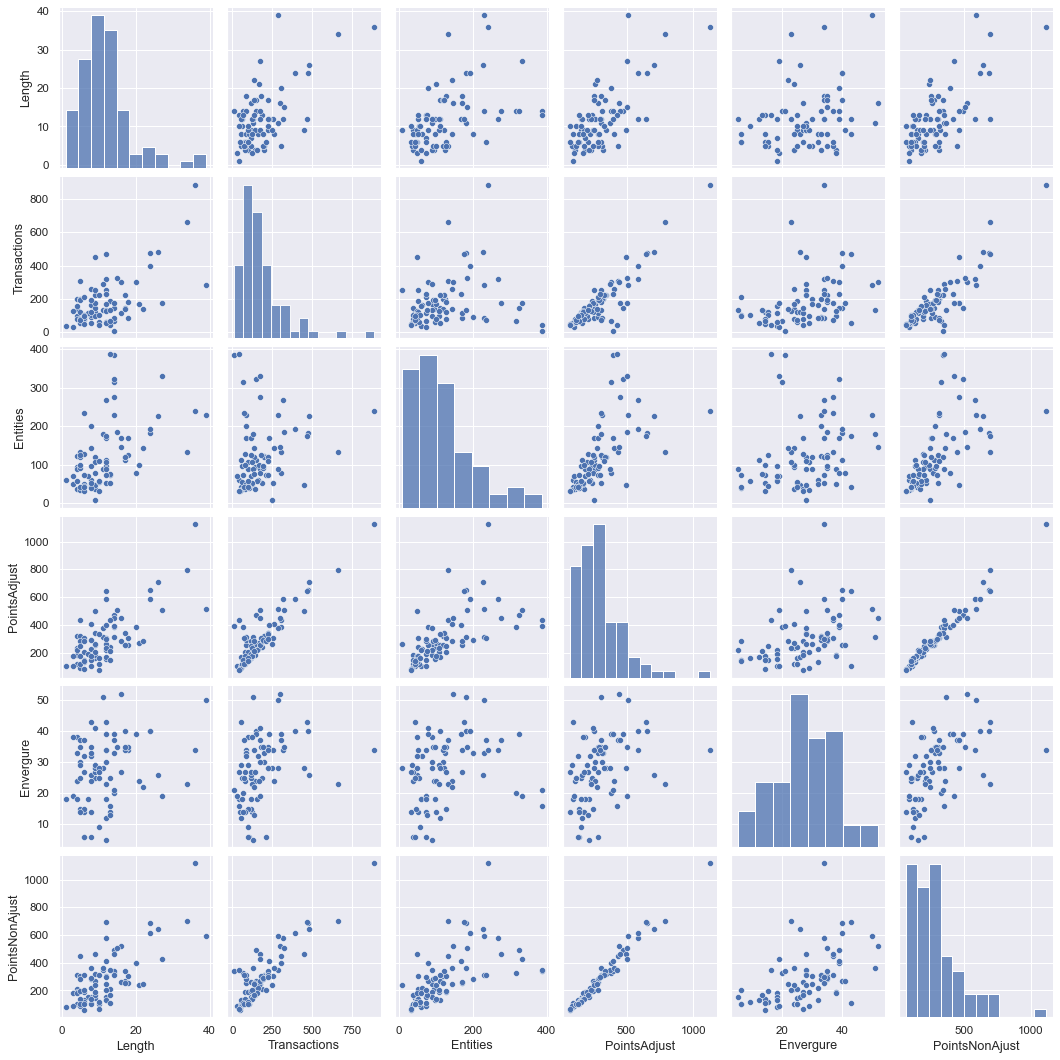

In [24]:
sns.pairplot(ds[['Length', 'Transactions', 'Entities', 'PointsAdjust', 'Envergure', 'PointsNonAjust']])

##### Scatter plots between selected features and Effort

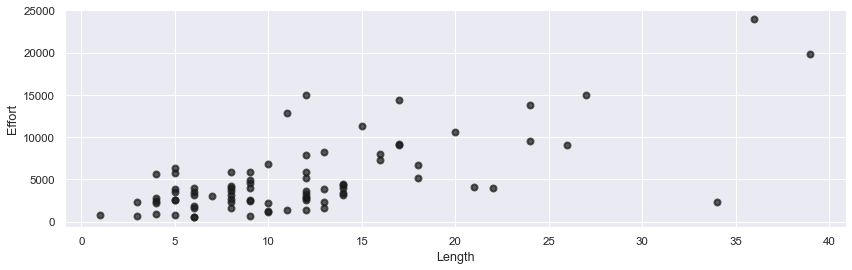

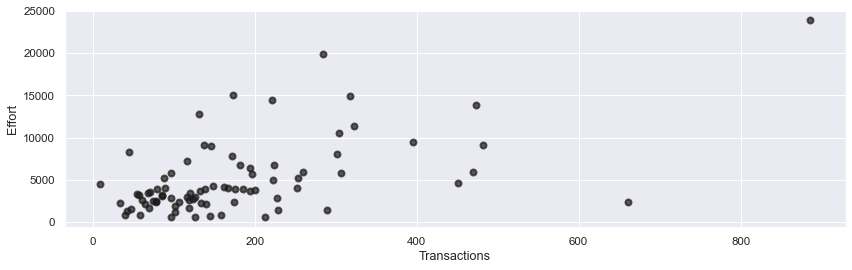

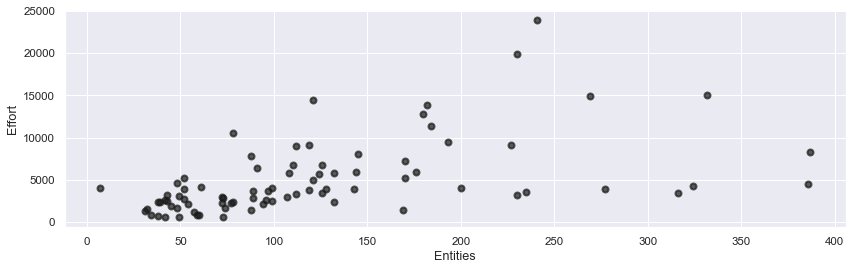

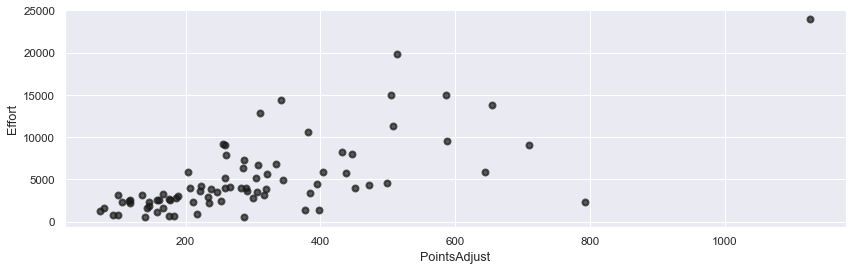

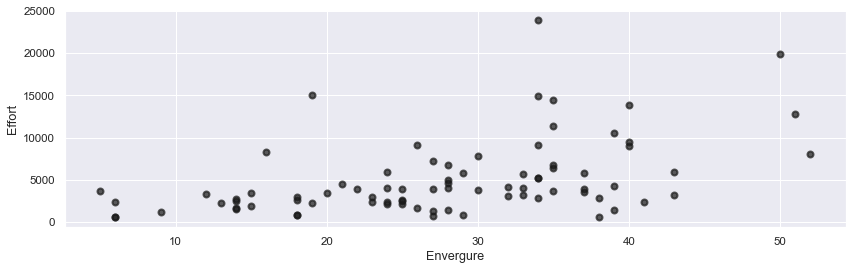

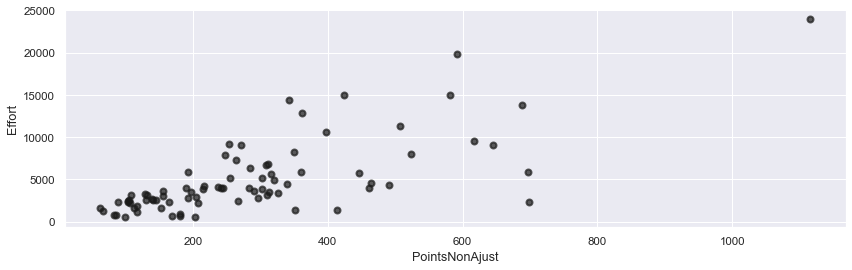

In [25]:
cols = ['Project', 'TeamExp', 'ManagerExp', 'YearEnd', 'Length', 'Transactions', 'Entities', 'PointsAdjust', 'Envergure', 'PointsNonAjust', 'Language']
features = ds[['Length', 'Transactions', 'Entities', 'PointsAdjust', 'Envergure', 'PointsNonAjust']]
for i, cols in enumerate(features):
    plt.figure(figsize=(14,4))
    plt.scatter(ds[cols], ds['Effort'], lw=2, alpha= 0.7, c='k' )
    plt.xlabel(cols)
    plt.ylabel('Effort')
    plt.show()

## Data Pre-Processing

1. Split dataset into training and testing parts (80/20)
2. Different splits of dataset (with/without feature selection, with/without feature scaling)

##### Data split 1: full dataset, no scaling

In [26]:
X = ds.drop(['Project', 'YearEnd', 'Effort'], axis = 1)
y = ds['Effort']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Data split 2: full dataset, with scaling

In [27]:
sc_X = StandardScaler()

X2_train = sc_X.fit_transform(X_train)
X2_test = sc_X.fit_transform(X_test)
y2_train = y_train
y2_test = y_test

##### Data split 3: feature selected dataset, no scaling

In [28]:
X3 = ds[['Length', 'Transactions', 'Entities', 'PointsAdjust', 'Envergure', 'PointsNonAjust']]
y3 = ds['Effort']

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

##### Data split 4: feature selected dataset, with scaling

In [29]:
sc_X4 = StandardScaler()

X4_train = sc_X4.fit_transform(X3_train)
X4_test = sc_X4.fit_transform(X3_test)
y4_train = y3_train
y4_test = y3_test

## Linear Regression

##### Model Training

In [30]:
lr1 = LinearRegression()
lr1.fit(X_train,y_train)

lr3 = LinearRegression()
lr3.fit(X3_train,y3_train)

LinearRegression()

##### Predictions

In [31]:
lr1_pred = lr1.predict(X_test)
lr3_pred = lr3.predict(X3_test)

##### Evaluation

Linear Regression Performance:

All features, No scaling:
MAE: 1598.5247165609667
RMSE: 2258.4091956999832
R2_Score:  0.6002421313652164

Selected features, No scaling:
MAE: 1660.794379499061
RMSE: 2391.906098925477
R2_Score:  0.5515851295572127


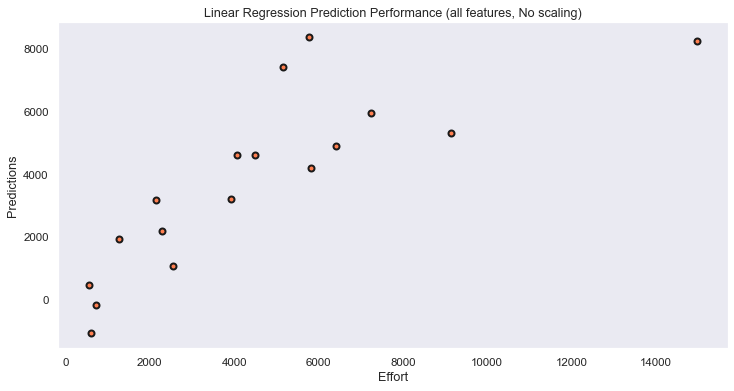

In [32]:
print('Linear Regression Performance:')

print('\nAll features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, lr1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lr1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, lr1_pred))

print('\nSelected features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y3_test, lr3_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3_test, lr3_pred)))
print('R2_Score: ', metrics.r2_score(y3_test, lr3_pred))

fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test,lr1_pred,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('Effort') 
plt.ylabel('Predictions') 
plt.title('Linear Regression Prediction Performance (all features, No scaling)') 
plt.grid()
plt.show()

## Lasso Regression

##### Model Training

In [33]:
lsr1 = linear_model.Lasso(max_iter=1500)
lsr1.fit(X_train, y_train)

lsr3 = linear_model.Lasso(max_iter=1500)
lsr3.fit(X3_train, y3_train)

Lasso(max_iter=1500)

##### Predictions

In [34]:
lsr1_pred = lsr1.predict(X_test)
lsr3_pred = lsr3.predict(X3_test)

##### Evaluation

Lasso Regression Performance:

All features, No scaling:
MAE: 1597.9816450043127
RMSE: 2257.7702077438107
R2_Score:  0.6004683121008647

Selected features, No scaling:
MAE: 1660.6855948369862
RMSE: 2391.8615029179973
R2_Score:  0.5516018503862645


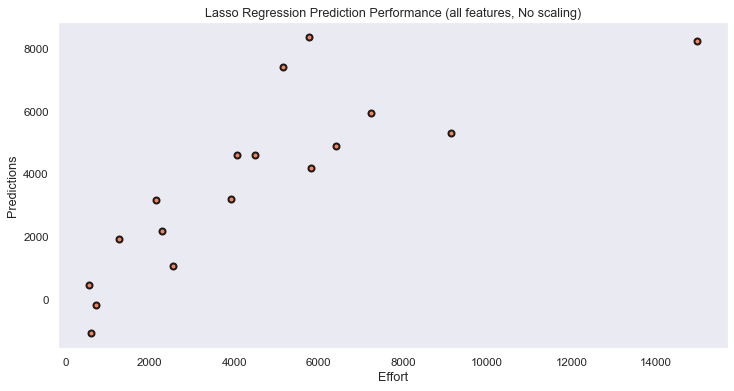

In [35]:
print('Lasso Regression Performance:')

print('\nAll features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, lsr1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lsr1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, lsr1_pred))

print('\nSelected features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y3_test, lsr3_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3_test, lsr3_pred)))
print('R2_Score: ', metrics.r2_score(y3_test, lsr3_pred))

fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test,lsr1_pred,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('Effort') 
plt.ylabel('Predictions') 
plt.title('Lasso Regression Prediction Performance (all features, No scaling)') 
plt.grid()
plt.show()

## Ridge Regression

##### Model Training

In [36]:
rr1 = Ridge()
rr1.fit(X_train, y_train)

rr2 = Ridge()
rr2.fit(X2_train, y2_train)

rr3 = Ridge()
rr3.fit(X3_train, y3_train)

rr4 = Ridge()
rr4.fit(X4_train, y4_train)

Ridge()

##### Predictions

In [37]:
rr1_pred = rr1.predict(X_test)
rr2_pred = rr2.predict(X2_test)
rr3_pred = rr3.predict(X3_test)
rr4_pred = rr4.predict(X4_test)

##### Evaluation

Ridge Regression Performance:

All features, No scaling:
MAE: 1583.4046031976277
RMSE: 2246.2020018913063
R2_Score:  0.6045520086611124

All features, with scaling:
MAE: 1727.9779114035061
RMSE: 2321.4271112394504
R2_Score:  0.5776214468161862

Selected features, No scaling:
MAE: 1660.5956516919925
RMSE: 2391.9821273003654
R2_Score:  0.551556622756119

Selected features, with scaling:
MAE: 1610.229282100146
RMSE: 2030.8129053509954
R2_Score:  0.6767551732284147


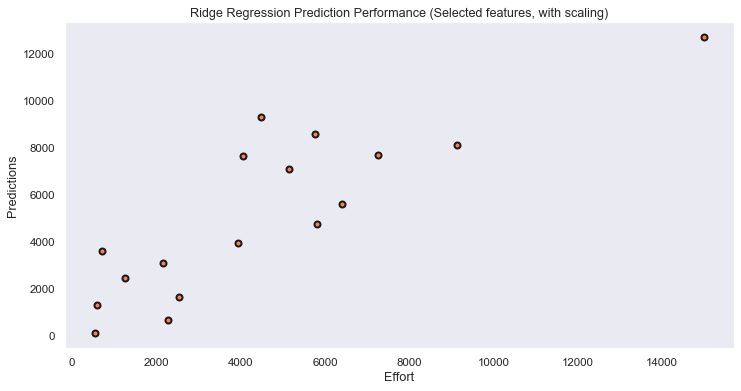

In [38]:
print('Ridge Regression Performance:')

print('\nAll features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, rr1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rr1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, rr1_pred))

print('\nAll features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y2_test, rr2_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, rr2_pred)))
print('R2_Score: ', metrics.r2_score(y2_test, rr2_pred))

print('\nSelected features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y3_test, rr3_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3_test, rr3_pred)))
print('R2_Score: ', metrics.r2_score(y3_test, rr3_pred))

print('\nSelected features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y4_test, rr4_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y4_test, rr4_pred)))
print('R2_Score: ', metrics.r2_score(y4_test, rr4_pred))

fig = plt.figure(figsize=(12, 6))
plt.scatter(y4_test,rr4_pred,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('Effort') 
plt.ylabel('Predictions') 
plt.title('Ridge Regression Prediction Performance (Selected features, with scaling)') 
plt.grid()
plt.show()

## Elastic Net Regression

##### Model Training

In [39]:
en1 = ElasticNet(max_iter=80000)
en1.fit(X_train, y_train)

en2 = ElasticNet()
en2.fit(X2_train, y2_train)

en3 = ElasticNet(max_iter=90000)
en3.fit(X3_train, y3_train)

en4 = ElasticNet()
en4.fit(X4_train, y4_train)

ElasticNet()

##### Predictions

In [40]:
en1_pred = en1.predict(X_test)
en2_pred = en2.predict(X2_test)
en3_pred = en3.predict(X3_test)
en4_pred = en4.predict(X4_test)

##### Evaluation

ElasticNet Regression Performance:

All features, No scaling:
MAE: 1563.3363973154972
RMSE: 2228.394256561741
R2_Score:  0.6107973264960587

All features, with scaling:
MAE: 1651.4662140991225
RMSE: 2056.337341629763
R2_Score:  0.6685786529866055

Selected features, No scaling:
MAE: 1655.0847705762212
RMSE: 2394.3376667267667
R2_Score:  0.5506729655081655

Selected features, with scaling:
MAE: 1759.9218950394213
RMSE: 2119.17696019264
R2_Score:  0.6480133425458907


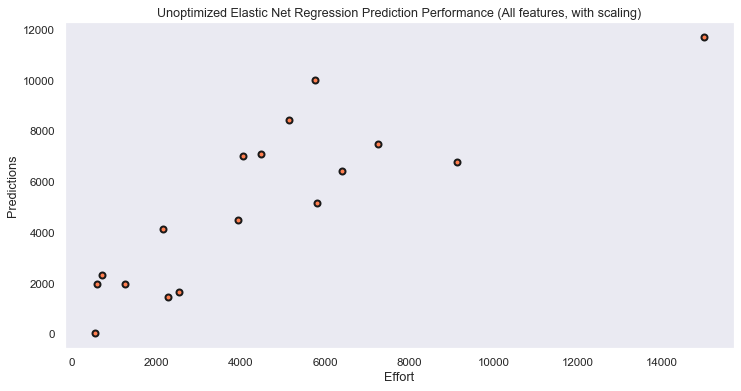

In [41]:
print('ElasticNet Regression Performance:')

print('\nAll features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, en1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, en1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, en1_pred))

print('\nAll features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y2_test, en2_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, en2_pred)))
print('R2_Score: ', metrics.r2_score(y2_test, en2_pred))

print('\nSelected features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y3_test, en3_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3_test, en3_pred)))
print('R2_Score: ', metrics.r2_score(y3_test, en3_pred))

print('\nSelected features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y4_test, en4_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y4_test, en4_pred)))
print('R2_Score: ', metrics.r2_score(y4_test, en4_pred))

fig = plt.figure(figsize=(12, 6))
plt.scatter(y2_test,en2_pred,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('Effort') 
plt.ylabel('Predictions') 
plt.title('Unoptimized Elastic Net Regression Prediction Performance (All features, with scaling)') 
plt.grid()
plt.show()

## SVM

##### Model Training

In [42]:
svm1 = SVR(kernel='linear')
svm1.fit(X_train,y_train)

svm3 = SVR(kernel='linear')
svm3.fit(X3_train,y3_train)

SVR(kernel='linear')

##### Predictions

In [43]:
svm1_pred = svm1.predict(X_test)
svm3_pred = svm3.predict(X3_test)

##### Evaluation


All features, No scaling:
MAE: 1927.0168103036824
RMSE: 2857.684248610148
R2_Score:  0.3599406649430852

Selected features, No scaling:
MAE: 1922.727877035871
RMSE: 2848.6699435140313
R2_Score:  0.363972314099011


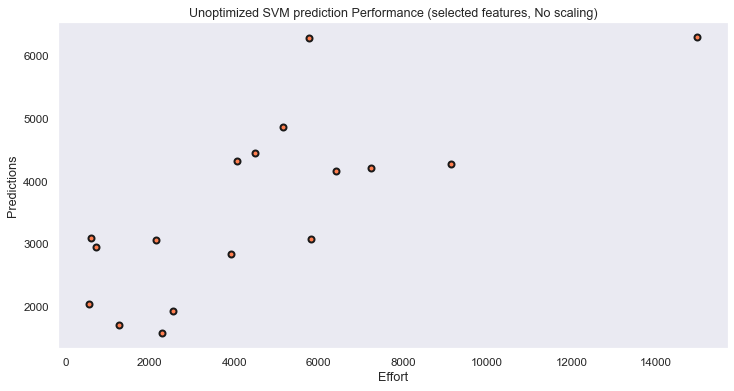

In [44]:

print('\nAll features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, svm1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, svm1_pred))

print('\nSelected features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y3_test, svm3_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3_test, svm3_pred)))
print('R2_Score: ', metrics.r2_score(y3_test, svm3_pred))

fig = plt.figure(figsize=(12, 6))
plt.scatter(y3_test,svm3_pred,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('Effort') 
plt.ylabel('Predictions') 
plt.title('Unoptimized SVM prediction Performance (selected features, No scaling)') 
plt.grid()
plt.show()

##### Optimizing SVM

In [69]:
param_grid = {'C':[1, 10, 100],
             'kernel':['linear'],
             'gamma':('auto', 'scale')}
grid = GridSearchCV(SVR(), param_grid, verbose=3, n_jobs=-1)

In [70]:
grid.fit(X3_train, y3_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.3s finished


GridSearchCV(estimator=SVR(), n_jobs=-1,
             param_grid={'C': [1, 10, 100], 'gamma': ('auto', 'scale'),
                         'kernel': ['linear']},
             verbose=3)

In [71]:
grid.best_params_

{'C': 10, 'gamma': 'auto', 'kernel': 'linear'}

In [72]:
grid.best_estimator_

SVR(C=10, gamma='auto', kernel='linear')

In [73]:
grid_predictions = grid.predict(X3_test)

MAE: 1879.5635425287471
RMSE: 2788.3548716610353
R2_Score:  0.3906204939118719


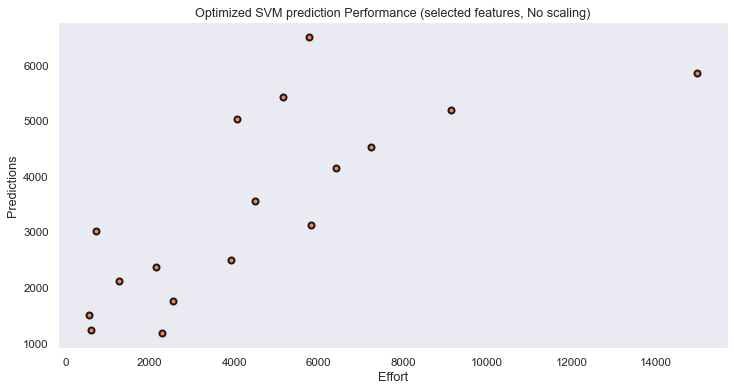

In [74]:
print('MAE:', metrics.mean_absolute_error(y3_test, grid_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3_test, grid_predictions)))
print('R2_Score: ', metrics.r2_score(y3_test, grid_predictions))

fig = plt.figure(figsize=(12, 6))
plt.scatter(y3_test,grid_predictions,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('Effort') 
plt.ylabel('Predictions') 
plt.title('Optimized SVM prediction Performance (selected features, No scaling)') 
plt.grid()
plt.show()

## Random Forest Regressor

##### Model Training

In [87]:
rf1 = RandomForestRegressor()
rf1.fit(X_train, y_train)

rf2 = RandomForestRegressor()
rf2.fit(X2_train, y2_train)

rf3 = RandomForestRegressor()
rf3.fit(X3_train, y3_train)

rf4 = RandomForestRegressor()
rf4.fit(X4_train, y4_train)

RandomForestRegressor()

##### Predictions

In [88]:
rf1_pred = rf1.predict(X_test)
rf2_pred = rf2.predict(X2_test)
rf3_pred = rf3.predict(X3_test)
rf4_pred = rf4.predict(X4_test)

##### Evaluation

Random Forest Regressor Performance:

All features, No scaling:
MAE: 1880.251176470588
RMSE: 2234.3392301962826
R2_Score:  0.6087179044764446

All features, with scaling:
MAE: 1909.9670588235294
RMSE: 2360.501470351038
R2_Score:  0.5632827922521662

Selected features, No scaling:
MAE: 1882.0388235294117
RMSE: 2351.701897012409
R2_Score:  0.5665327476025841

Selected features, with scaling:
MAE: 1771.57
RMSE: 2281.457481607394
R2_Score:  0.5920410053404099


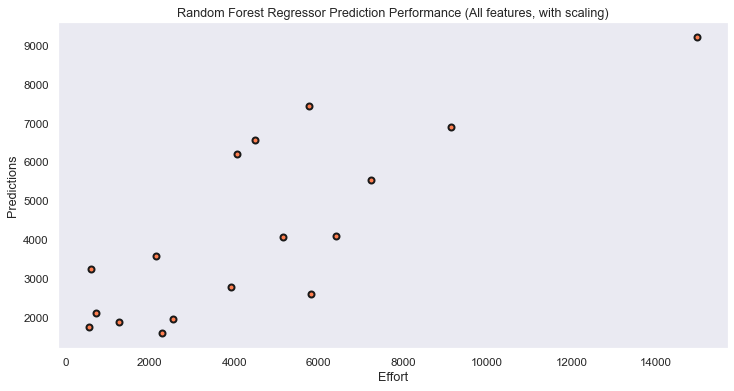

In [89]:
print('Random Forest Regressor Performance:')

print('\nAll features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, rf1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, rf1_pred))

print('\nAll features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y2_test, rf2_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, rf2_pred)))
print('R2_Score: ', metrics.r2_score(y2_test, rf2_pred))

print('\nSelected features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y3_test, rf3_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3_test, rf3_pred)))
print('R2_Score: ', metrics.r2_score(y3_test, rf3_pred))

print('\nSelected features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y4_test, rf4_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y4_test, rf4_pred)))
print('R2_Score: ', metrics.r2_score(y4_test, rf4_pred))

fig = plt.figure(figsize=(12, 6))
plt.scatter(y2_test,rf1_pred,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('Effort') 
plt.ylabel('Predictions') 
plt.title('Random Forest Regressor Prediction Performance (All features, with scaling)') 
plt.grid()
plt.show()

##### Optimizing RF Regressor

In [90]:
rf_param_grid = {'criterion':('mse', 'mae'),
                'bootstrap':[False, True],
                'n_estimators':[100, 500, 1000],
                'max_features':('auto', 'sqrt', 'log2')}
rf_grid = GridSearchCV(RandomForestRegressor(), rf_param_grid, verbose=3, n_jobs=-1)

In [91]:
rf_grid.fit(X2_train, y2_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   34.0s finished


GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [False, True],
                         'criterion': ('mse', 'mae'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': [100, 500, 1000]},
             verbose=3)

In [92]:
rf_grid.best_params_

{'bootstrap': True,
 'criterion': 'mae',
 'max_features': 'sqrt',
 'n_estimators': 100}

In [93]:
rf_grid.best_estimator_

RandomForestRegressor(criterion='mae', max_features='sqrt')

In [94]:
rf_grid_predictions = rf_grid.predict(X2_test)

MAE: 1669.794705882353
RMSE: 2148.978965452855
R2_Score:  0.6380437475062002


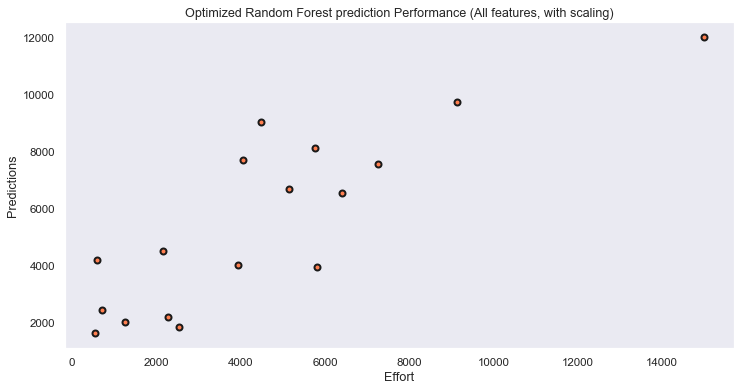

In [95]:
print('MAE:', metrics.mean_absolute_error(y2_test, rf_grid_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, rf_grid_predictions)))
print('R2_Score: ', metrics.r2_score(y2_test, rf_grid_predictions))
fig = plt.figure(figsize=(12, 6))
plt.scatter(y2_test,rf_grid_predictions,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('Effort') 
plt.ylabel('Predictions') 
plt.title('Optimized Random Forest prediction Performance (All features, with scaling)') 
plt.grid()
plt.show()

## MLP Regressor

##### Model Training

In [60]:
mlp1 = MLPRegressor(solver='lbfgs', max_iter=2000)
mlp1.fit(X_train, y_train)

mlp3 = MLPRegressor(solver='lbfgs', max_iter=2000)
mlp3.fit(X3_train, y3_train)

MLPRegressor(max_iter=2000, solver='lbfgs')

##### Predictions

In [61]:
mlp1_pred = mlp1.predict(X_test)
mlp3_pred = mlp3.predict(X3_test)

##### Evaluation

MLP Regressor Performance:

All features, No scaling:
MAE: 1985.2975437548457
RMSE: 2720.774825318486
R2_Score:  0.4198010279653178

Selected features, No scaling:
MAE: 2075.0787802682225
RMSE: 2347.2959922485516
R2_Score:  0.5681554247103253


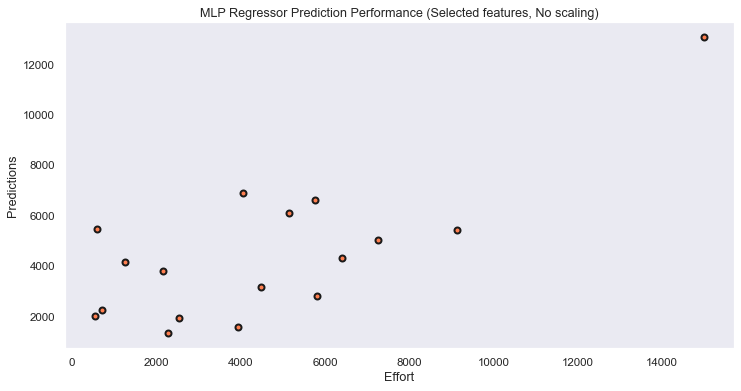

In [62]:
print('MLP Regressor Performance:')

print('\nAll features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, mlp1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, mlp1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, mlp1_pred))

print('\nSelected features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y3_test, mlp3_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3_test, mlp3_pred)))
print('R2_Score: ', metrics.r2_score(y3_test, mlp3_pred))

fig = plt.figure(figsize=(12, 6))
plt.scatter(y3_test,mlp3_pred,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('Effort') 
plt.ylabel('Predictions') 
plt.title('MLP Regressor Prediction Performance (Selected features, No scaling)') 
plt.grid()
plt.show()

## K Neighbors Regression

##### Model Training

In [117]:
kn2 = KNeighborsRegressor()
kn2.fit(X2_train, y2_train)

kn4 = KNeighborsRegressor()
kn4.fit(X4_train, y4_train)

KNeighborsRegressor()

##### Predictions

In [118]:
kn2_pred = kn2.predict(X2_test)
kn4_pred = kn4.predict(X4_test)

##### Evaluation

KNeighbors Regressor Performance:

All features, with scaling:
MAE: 1561.5294117647059
RMSE: 2056.8763078713196
R2_Score:  0.6684048990767193

Selected features, with scaling:
MAE: 1807.058823529412
RMSE: 2258.496967141695
R2_Score:  0.6002110581599228


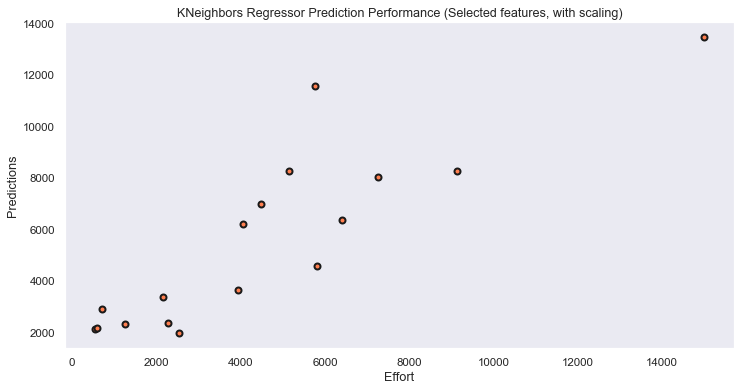

In [121]:
print('KNeighbors Regressor Performance:')

print('\nAll features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y2_test, kn2_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, kn2_pred)))
print('R2_Score: ', metrics.r2_score(y2_test, kn2_pred))

print('\nSelected features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y4_test, kn4_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y4_test, kn4_pred)))
print('R2_Score: ', metrics.r2_score(y4_test, kn4_pred))

fig = plt.figure(figsize=(12, 6))
plt.scatter(y2_test,kn2_pred,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('Effort') 
plt.ylabel('Predictions') 
plt.title('KNeighbors Regressor Prediction Performance (Selected features, with scaling)') 
plt.grid()
plt.show()